In [1]:
# Sung Mo Yang
# 112801117
# Initialize environment and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

data = pd.read_csv('AB_NYC_2019.csv')

In [2]:
# Task 1

"""
Cleaning the data required three parts. First, the rows with missing fields for
name and host_name were removed. Analysis of the data showed that, of the 16
columns, only name, host_name, last_review, and reviews_per_month had missing fields.
last_review and reviews_per_month were not removed because the fact that they were 
missing could be a useful metric. Missing name and host_name are significant enough to
warrant removal of the entry itself because it can cause confusion in the data. Second, 
the rows with duplicate longitude and lattitude coordinates were removed. This was done 
because duplicate coordinates indicated that the hosting was redundant. While duplicate 
hostings could be accumulated into one entry, this was not done. Finally, the strings 
were cleaned by removing the \n escape character.
"""

print("Missing Fields\t\t\tColumn")
print(data.isnull().sum())
print()

print("Removing rows with missing name and/or host_name")
data.dropna(subset=["name", "host_name"], inplace=True)
print("shape:", data.shape)
print()

print("Removing rows with duplicate latitude and/or longitude")
data.drop_duplicates(subset=["latitude", "longitude"], inplace=True)
print("shape:", data.shape)
print()

print("Replace empty strings in last_review with pandas.NaT (Not a Time)")
data["last_review"].replace("", pd.NaT, inplace=True)
print()

print("Replace empty strings in reviews_per_month with '0'")
data["reviews_per_month"].replace("", "0", inplace=True)
print("shape:", data.shape)
print()

print("Clean 'name' column by removing \\n escape char")
data["name"] = data["name"].str.replace("[^a-zA-Z ]", "", regex=False)
print("shape:", data.shape)

print("Cleaning 'name' column by removing all non-english characters")
data["name"] = data["name"].str.replace("[^a-zA-Z ]", "")

print()

Missing Fields			Column
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Removing rows with missing name and/or host_name
shape: (48858, 16)

Removing rows with duplicate latitude and/or longitude
shape: (48834, 16)

Replace empty strings in last_review with pandas.NaT (Not a Time)

Replace empty strings in reviews_per_month with '0'
shape: (48834, 16)

Clean 'name' column by removing \n esca

C:\Users\sungm\AppData\Local\Temp\ipykernel_2800\1130979082.py:44: FutureWarning: The default value of regex will change from True to False in a future version.
  data["name"] = data["name"].str.replace("[^a-zA-Z ]", "")


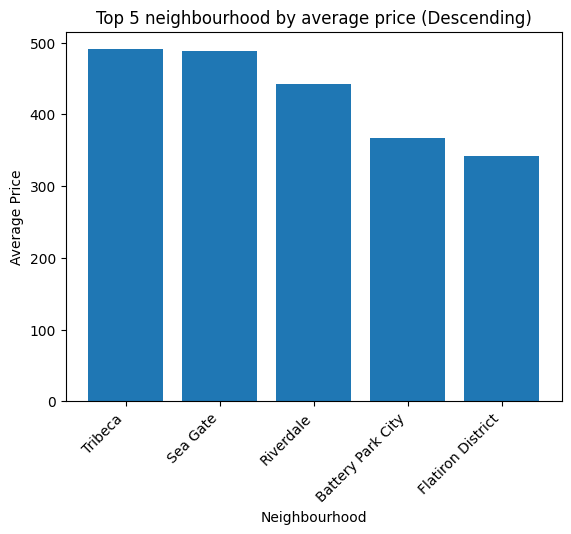

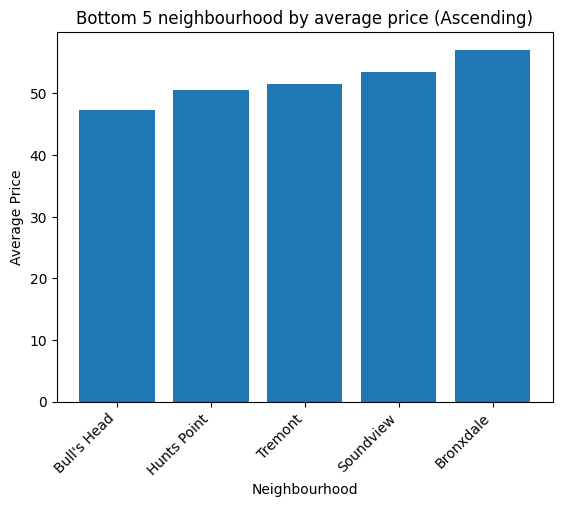

In [3]:
# Task 2a
# Top 5 and bottom 5 neighbourhood by price
# Average price was used as the metric for determining price per neighbourhood

# remove neighbourhood groups with less than 5 listings
neighbourhoodCounts = data.groupby('neighbourhood')['id'].count()
neighbourhoodCounts = neighbourhoodCounts[neighbourhoodCounts > 5]
dataFiltered = data[data['neighbourhood'].isin(neighbourhoodCounts.index)]

# Calculate the average price for each neighbourhood
neighbourhoodPrices = dataFiltered.groupby('neighbourhood')['price'].mean()

# Sort the neighbourhood by average price in descending order
neighbourhoodPrices = neighbourhoodPrices.sort_values(ascending=False)

# Get the top 5 and bottom 5 neighborhoods
top_5 = neighbourhoodPrices.head(5)
bottom_5 = neighbourhoodPrices.tail(5)

# reverse the bottom 5 so that it is in ascending order
bottom_5 = bottom_5.iloc[::-1]

# print("Top 5 neighbourhood by average price (Descending)")
# print(top_5)
# print()
# print("Bottom 5 neighbourhood by average price (Ascending)")
# print(bottom_5)

# plot the top 5 and bottom 5 neighbourhoods
plt.title("Top 5 neighbourhood by average price (Descending)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.bar(top_5.index, top_5.values)
plt.show()

plt.title("Bottom 5 neighbourhood by average price (Ascending)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.bar(bottom_5.index, bottom_5.values)
plt.show()

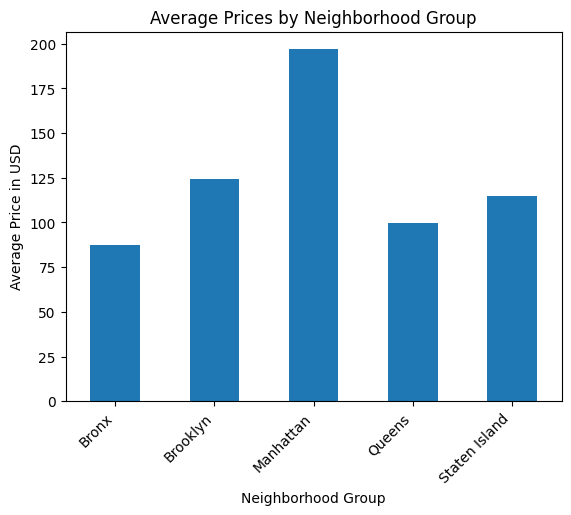

In [4]:
# Task 2b
# Analyze price vartion between neighbourhood groups and plot trends

# Group the data by neighborhood group and calculate the mean price for each group
grouped = data.groupby('neighbourhood_group')['price'].mean()

# Plot the mean prices for each group
grouped.plot(kind='bar')
plt.title('Average Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


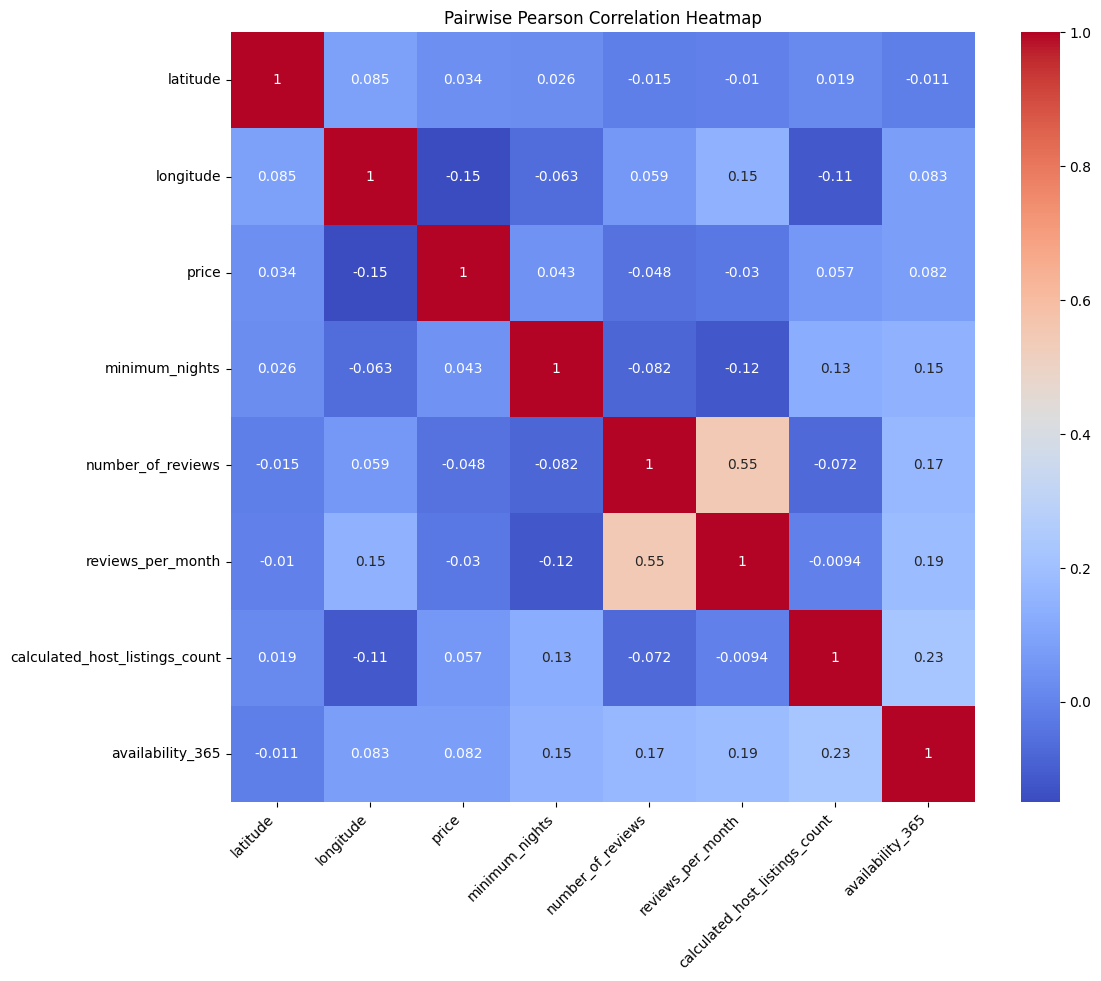

Top 5 positive correlations
reviews_per_month  number_of_reviews                 0.549830
availability_365   calculated_host_listings_count    0.225671
reviews_per_month  availability_365                  0.185968
availability_365   number_of_reviews                 0.171922
longitude          reviews_per_month                 0.146288
dtype: float64

Top 5 negative correlations
price                           longitude           -0.149953
minimum_nights                  reviews_per_month   -0.121706
calculated_host_listings_count  longitude           -0.114727
minimum_nights                  number_of_reviews   -0.081630
calculated_host_listings_count  number_of_reviews   -0.072388
dtype: float64


In [5]:
# Task 3
# Select a set of most interesting features
# Do a pairwise Pearson correlation analysis on all pairs
# Show the result with a heat map and find out most positive and negative correlations

# Select the most interesting features (limited by numeric_only)
interestingFeatures = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
dataFiltered = data[interestingFeatures]

# Pairwise Pearson correlation analysis on all pairs
ppCorr = dataFiltered.corr(method="pearson")

# create a heatmap using Matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(ppCorr, cmap='coolwarm', annot=True)
plt.title('Pairwise Pearson Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

# this is such a stupid way of doing it but the library functions affect matrix size
# get the top 10 correlations
sortedCorrAsc = ppCorr.unstack().sort_values(ascending=True)
sortedCorrDesc = ppCorr.unstack().sort_values(ascending=False)
# remove first 10 entries of sortedCorrAsc
sortedCorrDesc = sortedCorrDesc[8:]
# get first 10 entries
sortedCorrAsc = sortedCorrAsc[:10]
sortedCorrDesc = sortedCorrDesc[:10]
#remove every other entry because it is a duplicate
sortedCorrAsc = sortedCorrAsc[::2]
sortedCorrDesc = sortedCorrDesc[::2]

print("Top 5 positive correlations")
print(sortedCorrDesc)
print()
print("Top 5 negative correlations")
print(sortedCorrAsc)

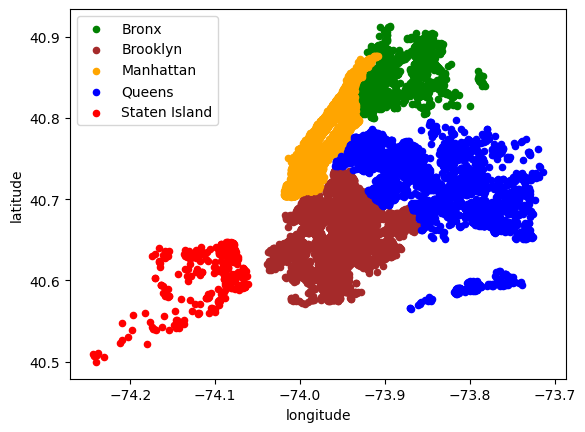

In [6]:
# Task 4a
# Plot a scatter plot based on these coordinates
# Points are color coded based on the neighborhood group feature

# set colors for each neighborhood group
colors = {'Manhattan': 'orange', 
          'Brooklyn': 'brown', 
          'Queens': 'blue', 
          'Staten Island': 'red', 
          'Bronx': 'green'}

# create custom scatter plot
fig, ax = plt.subplots()

# separate data by neighborhood group
dataFiltered = data.groupby('neighbourhood_group')

# iterate through each neighborhood group and plot the data
for neighborhoodGroup, entires in dataFiltered:
    entires.plot(ax=ax, 
                 kind='scatter', 
                 x='longitude', 
                 y='latitude', 
                 label=neighborhoodGroup, 
                 color=colors[neighborhoodGroup])

plt.legend()
plt.show()

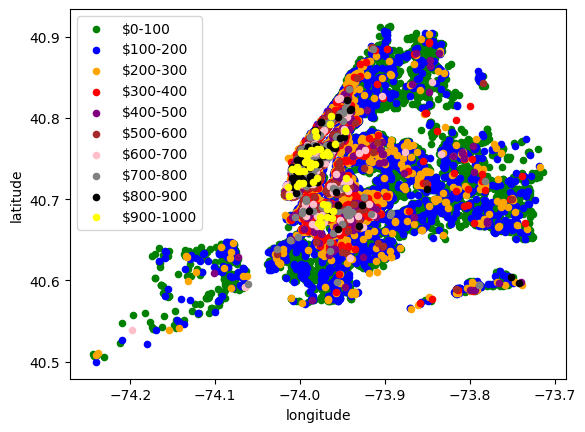

In [7]:
# Task 4b
# Plot a scatter plot based on these coordinates
# Points are color coded based on the price of the listing


# set priceRange to color mapping
colorsPrice={
    '$0-100': 'green',
    '$100-200': 'blue',
    '$200-300': 'orange',
    '$300-400': 'red',
    '$400-500': 'purple',
    '$500-600': 'brown',
    '$600-700': 'pink',
    '$700-800': 'gray',
    '$800-900': 'black',
    '$900-1000': 'yellow'
}

# create custom scatter plot
fig, ax = plt.subplots()

# remove listings with price greater than 1000
dataFiltered = data[data['price'] < 1000]

# give each listing a new column, color, based on price
dataFiltered = dataFiltered.assign(color=pd.cut(dataFiltered['price'], 
                                                bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                                                labels=['$0-100', '$100-200', '$200-300', '$300-400', '$400-500', '$500-600', '$600-700', '$700-800', '$800-900', '$900-1000']))

# iterate through each price range and plot the data
for priceRange, entires in dataFiltered.groupby('color'):
    entires.plot(ax=ax, 
                 kind='scatter', 
                 x='longitude', 
                 y='latitude', 
                 label=priceRange, 
                 color=colorsPrice[priceRange])

plt.legend()
plt.show()

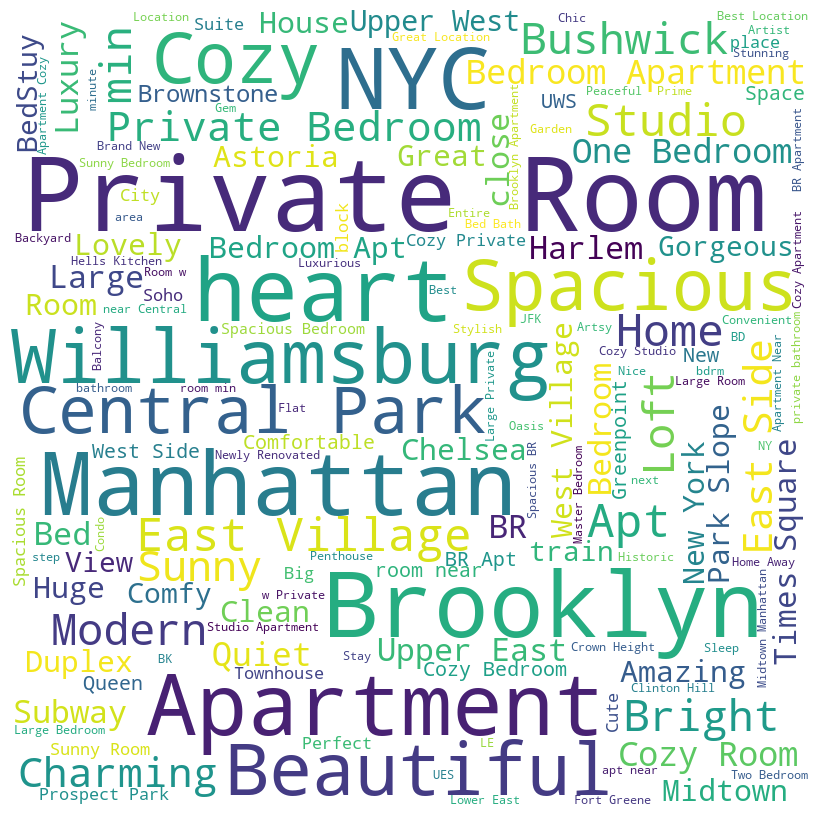

In [8]:
# Task 5
# Extract words from 'name' column and generate a word cloud

# Extact words from 'name' column and store them into a list of one-word elements
words = data['name'].str.split(expand=True).stack().tolist()
# join words into single string separated by spaces
words = ' '.join(words)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = STOPWORDS, min_font_size = 10).generate(words)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


By a wide margin, hosts in the Manhattan neighbourhood group area have the most
average number of listings per host. The main reason is that Manhattan is a 
very desirable and popular location for tourists. The last three plots below
help support this notion. The relationships between the three plots show
that, despite having the least number of average reviews and the highest
average prices, hosts in Manhattan are able to maintain a high average
number of listings per host. This metric indicates that even though the average 
price is high and the average number of reviews is low, tourists will still often 
book listings in Manhattan, giving the hosts have a reason to have that many 
listings. In addition, the hosts are able to charge so much more than that of
the other neighbourhood groups because of this high demand.

Socioeconomic factors also play a role in this. Manhattan is known for being
expensive, lavish, and a tourist destination. This notion enables hosts to
have as many li

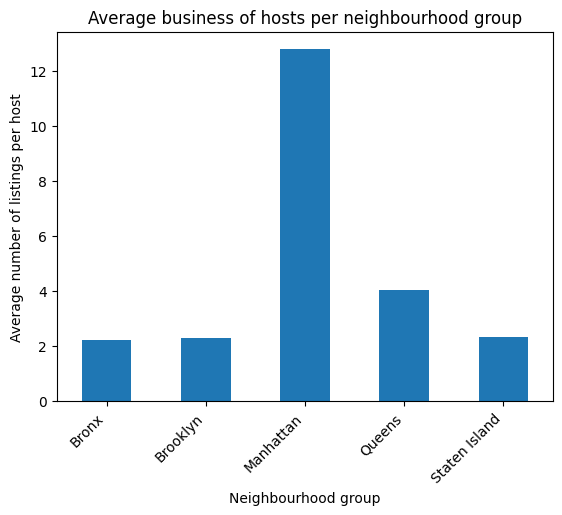

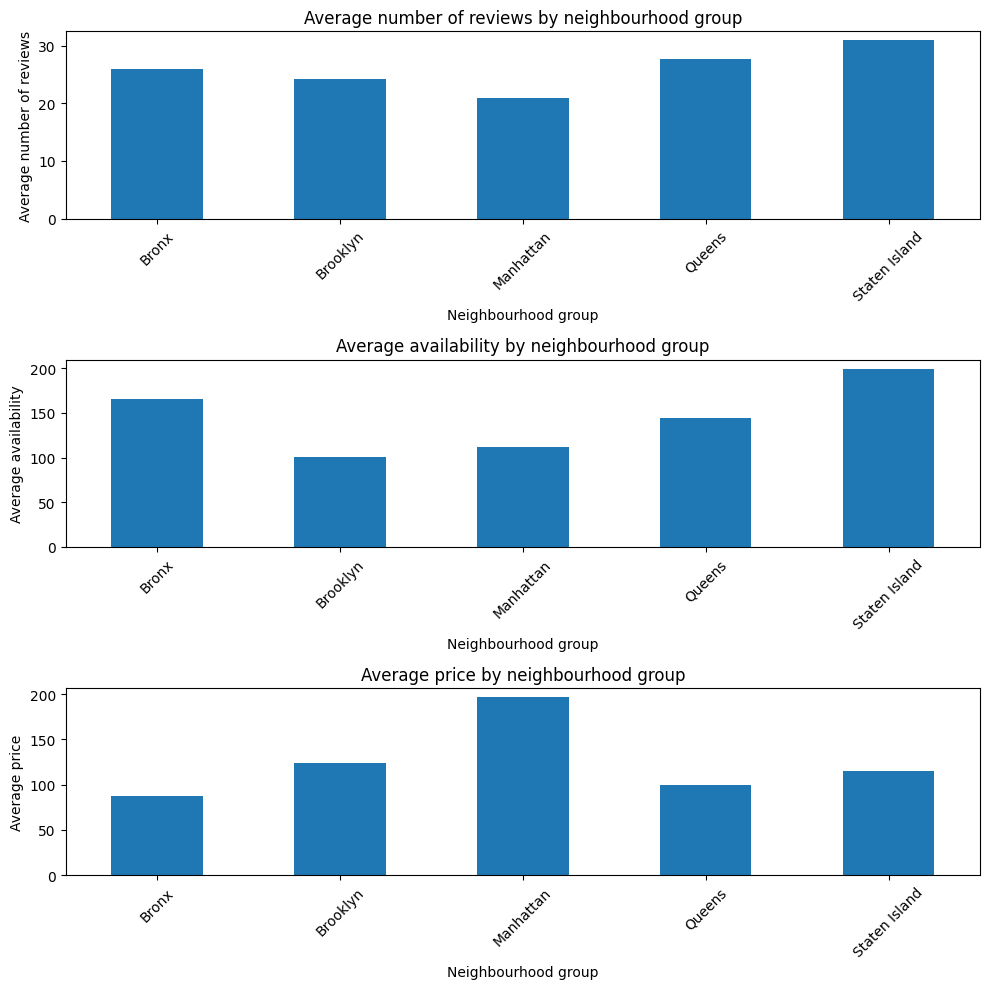

In [9]:
# Task 6
# Get areas with busiest hosts
# Which area has highest average number of listings per host?
# why these hosts are the busiest, considers factors such as availability, price, review, etc.?

reasoning = """
By a wide margin, hosts in the Manhattan neighbourhood group area have the most
average number of listings per host. The main reason is that Manhattan is a 
very desirable and popular location for tourists. The last three plots below
help support this notion. The relationships between the three plots show
that, despite having the least number of average reviews and the highest
average prices, hosts in Manhattan are able to maintain a high average
number of listings per host. This metric indicates that even though the average 
price is high and the average number of reviews is low, tourists will still often 
book listings in Manhattan, giving the hosts have a reason to have that many 
listings. In addition, the hosts are able to charge so much more than that of
the other neighbourhood groups because of this high demand.

Socioeconomic factors also play a role in this. Manhattan is known for being
expensive, lavish, and a tourist destination. This notion enables hosts to
have as many listings as they can, charging whatever they want - and tourists
will still book them. This is often not the case for the other neighbourhood groups.
"""

print(reasoning)

# Get neighbourhood groups with average number of listings per host
neighbourhoodGroupListings = data.groupby('neighbourhood_group')['calculated_host_listings_count'].mean()

# print("Average number of listings per host by neighbourhood group")
# print(neighbourhoodGroupListings)

# plot the results
neighbourhoodGroupListings.plot(kind='bar')
plt.title('Average business of hosts per neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Average number of listings per host')
plt.xticks(rotation=45, ha='right')

# Per neighbourhood group, calculate average price, number_of_reviews, and availability_365
neighbourhoodGroupPrice = data.groupby('neighbourhood_group')['price'].mean()
neighbourhoodGroupReviews = data.groupby('neighbourhood_group')['number_of_reviews'].mean()
neighbourhoodGroupAvailability = data.groupby('neighbourhood_group')['availability_365'].mean()

# Plot the results in separate plots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot average number of reviews
neighbourhoodGroupReviews.plot(ax=axs[0], kind='bar')
axs[0].set_title('Average number of reviews by neighbourhood group')
axs[0].set_xlabel('Neighbourhood group')
axs[0].set_ylabel('Average number of reviews')
axs[0].tick_params(axis='x', rotation=45)

# Plot average availability
neighbourhoodGroupAvailability.plot(ax=axs[1], kind='bar')
axs[1].set_title('Average availability by neighbourhood group')
axs[1].set_xlabel('Neighbourhood group')
axs[1].set_ylabel('Average availability')
axs[1].tick_params(axis='x', rotation=45)

# Plot average price
neighbourhoodGroupPrice.plot(ax=axs[2], kind='bar')
axs[2].set_title('Average price by neighbourhood group')
axs[2].set_xlabel('Neighbourhood group')
axs[2].set_ylabel('Average price')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The first plot shows the relationship between room types and the average number of reviews
left on the listing. The second plot shows the relationship between room types and the
average price of the listing.

An interesting detail here is that Private Rooms have the highest average number of
reviews while the average price of a Private Room is less than half of that of the
Entire Home/Apt room type and more closer to the average price of a Shared Room. This
shows that Private Rooms are the most desirable room type, resulting in more reviews
while being nearly as cheap as a Shared Room. This is can be supported by the idea that
Private Rooms are more affordable than Entire Home/Apt rooms and that Airbnb user population
is composed more of individuals rather than parties.

Another interesting detail here is that the listings for Shared Rooms
have the lowest average number of reviews. Shared Rooms are also the cheapest room type.
Cost/cheapness can be a measure of desirabiliy and demand.

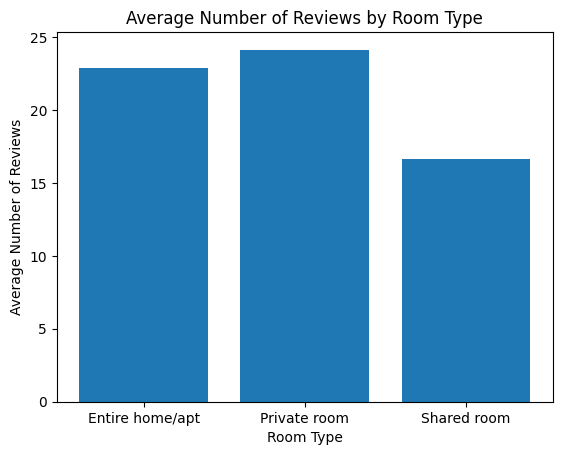

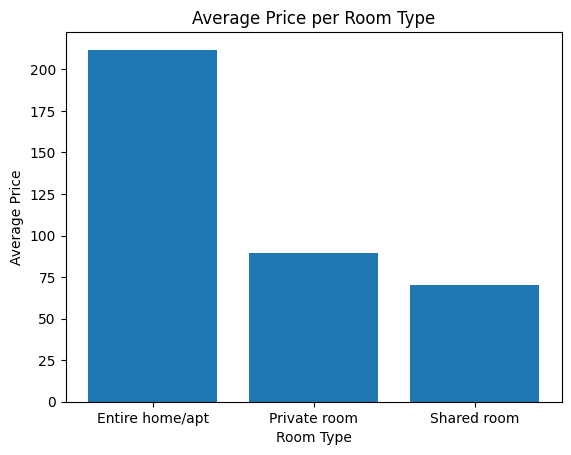

In [10]:
# Task 7
# unique plots

response = """
The first plot shows the relationship between room types and the average number of reviews
left on the listing. The second plot shows the relationship between room types and the
average price of the listing.

An interesting detail here is that Private Rooms have the highest average number of
reviews while the average price of a Private Room is less than half of that of the
Entire Home/Apt room type and more closer to the average price of a Shared Room. This
shows that Private Rooms are the most desirable room type, resulting in more reviews
while being nearly as cheap as a Shared Room. This is can be supported by the idea that
Private Rooms are more affordable than Entire Home/Apt rooms and that Airbnb user population
is composed more of individuals rather than parties.

Another interesting detail here is that the listings for Shared Rooms
have the lowest average number of reviews. Shared Rooms are also the cheapest room type.
Cost/cheapness can be a measure of desirabiliy and demand. Number of reviews can be a
measure of quality and satisfcation. Therefore, the relationship between these factors show
that cheap rooms are more likely to be of lower quality and result in less reviews.
This is interesting because it refutes the argument that a cheaper room can be more desirable
and have a higher demand than a more expensive room, resulting in more reviews that are
likely to recommend the room. The data proves otherwise.
"""
print(response)
# group the data by room type and calculate the mean number of reviews for each room type
roomtype_reviews = data.groupby('room_type')['number_of_reviews'].mean()
# plot the results
plt.bar(roomtype_reviews.index, roomtype_reviews.values)
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()


# Calculate the average price for each room type
avg_price_room_type = data.groupby('room_type')['price'].mean()
# Plot the bar graph
plt.bar(avg_price_room_type.index, avg_price_room_type.values)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()
